# ABC и XYZ анализ (TLC_Trip_Record_Data)
Полное описание данных доступно [здесь](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page). Оригинальное описание полей [тут](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

Записи включают поля, в которых указываются даты / время посадки и высадки, места посадки и высадки, расстояния поездки, подробные тарифы, типы тарифов, типы оплаты и количество пассажиров, указанное водителем. Данные, использованные в прилагаемых наборах данных, были собраны и предоставлены в Комиссию по такси и лимузинам Нью-Йорка (TLC) поставщиками технологий, уполномоченными в соответствии с программами повышения качества обслуживания пассажиров такси и ливреи (TPEP / LPEP). Данные поездки не были созданы TLC, и TLC не делает никаких заявлений относительно точности этих данных.

Имеется набор данных о поездках желтых такси в Нью Йорке за январь 2019 года.

Доступны следующие метаданные:
1. VendorID — оператор такси. 1 = Creative Mobile Technologies, 2 = VeriFone Inc. 4 = ?
2. tpep_pickup_datetime — дата и время включения счетчика
3. tpep_dropoff_datetime — дата и время выключения счетчика
4. Passenger_count — кол-во пассажиров (вводится водителем)
5. Trip_distance — прошедшее расстояние в милях, указанное таксометром
6. PULocationID — Идентификатор зоны в которой счетчик был включен
7. DOLocationID — Идентификатор зоны в которой счетчик был выключен
8. RateCodeID — тариф в конце поездки

1 = Стандартный тариф

2 = Аэропорт JFK

3 = Ньюарк

4 = Нассау или Вестчестер

5 = Договорной тариф

6 = Групповая поездка

9. Store_and_fwd_flag — Этот флаг показывает хранились ли данные о поездке "внутри машины", если не было соединения с сервером.
10. Payment_type — Код, обозначающий тип оплаты

1 = Кредитка

2 = Наличные

3 = Бесплатно или не было оплаты

4 = Спор (диспут)

5 = Неизвестно

6 = Аннулированная поездка
11. Fare_amount — время-дистанция, посчитанная счетчиком (что-то вроде нормированной длины поездки с учетом времени и дистанции, безразмерная величина)
12. Extra — Разные прибавки и доплаты. В данный момент включает в себя только 0.5\$ и 1\$ в час пик и ночная оплата
13. MTA_tax — Metropolitan commuter transportation mobility tax. Налог, выставляемый автоматически по пробегу
14. Improvement_surcharge — надбавка за благоустройство 0.30\$ (появилась в 2015)
15. Tip_amount — чаевые, заполняется автоматически для кредитных карт, наличные не считаются
16. Tolls_amount — Общая сумма всех сборов за поездку (налоговых и проч)
17. Total_amount — Суммарная стоимость
18. congestion_surcharge — сбор за пробки

FYI
[Разница между желтым и зеленым такси](https://freetoursbyfoot.com/taxi-guide-hailing-cab-nyc/) и еще [тут](https://en.wikipedia.org/wiki/Boro_taxi)

# Задание
1. Провести ABC анализ по стартовым-конечным локациям поездок. Существенно ли результаты анализа различаются в разбивке по операторам такси?
2. Провести XYZ анализ по стартовым-конечным локациям поездок. Существенно ли результаты анализа различаются в разбивке по операторам такси?
3. Для нескольких одинаковых зон посадки и высадки (штук 5) сравнить средние значения длительности поездки для операторов 1 и 2. Проверить истинность гипотезы о равенстве среднего времени для выбранных маршрутов с помощью t критерия и pvalue ([модуль stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html))
4. В базе student_x создать таблицу для загрузки этого набора данных. Загрузить набор данных в созданную таблицу и определить кол-во поездок каждый день в разбивке по операторам такси, а также общую сумму выручки за вычетом налогов.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive"

 Classroom		   IMG_20180430_013221.jpg
'Colab Notebooks'	   IMG_20180517_131324.jpg
 IMG_20171025_193402.jpg   IMG_20180517_204203.jpg
 IMG_20171201_195601.jpg   IMG_20180530_182812.jpg
 IMG_20180126_165228.jpg   IMG_20180530_183504.jpg
 IMG_20180126_165444.jpg   iris.gsheet
 IMG_20180127_002142.jpg  'yellow_tripdata_2019-01 (1).csv'
 IMG_20180130_011033.jpg   yellow_tripdata_2019-01.csv
 IMG_20180131_022337.jpg   Дзен.gsheet
 IMG_20180226_123835.jpg  'Концептуальная схема "Поликлиника"'
 IMG_20180407_222939.jpg  'Новый документ.gdoc'
 IMG_20180407_222942.jpg   Простава.gsheet
 IMG_20180417_123107.jpg  'Рейтинг 2019.gsheet'
 IMG_20180425_123524.jpg


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as sts

data = pd.read_csv('/content/drive/My Drive/yellow_tripdata_2019-01.csv')
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [ ]:
data.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [ ]:
data = data.astype({
'tpep_pickup_datetime': 'datetime64[ms]',
'tpep_dropoff_datetime': 'datetime64[ms]'
})

Исследовательский анализ данных. Очистка от выбросов

In [ ]:
data = data.drop(data[data.tpep_pickup_datetime > '2019-12-31'].index)
data = data.drop(data[data.tpep_pickup_datetime < '2019-01-01'].index)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.30,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,NaN
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.70,1,N,229,7,1,13.5,0.5,0.5,3.70,0.0,0.3,18.50,NaN
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.10,1,N,141,234,1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667787,2,2019-01-31 23:57:36,2019-02-01 00:18:39,1,4.79,1,N,263,4,1,18.0,0.5,0.5,3.86,0.0,0.3,23.16,0.0
7667788,2,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.00,1,N,193,193,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.00,1,N,264,264,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,1,0.00,1,N,264,7,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0


In [ ]:
data = data.drop(data[data.tpep_dropoff_datetime < '2019-01-01'].index)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.30,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,NaN
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.70,1,N,229,7,1,13.5,0.5,0.5,3.70,0.0,0.3,18.50,NaN
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.10,1,N,141,234,1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667787,2,2019-01-31 23:57:36,2019-02-01 00:18:39,1,4.79,1,N,263,4,1,18.0,0.5,0.5,3.86,0.0,0.3,23.16,0.0
7667788,2,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.00,1,N,193,193,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.00,1,N,264,264,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,1,0.00,1,N,264,7,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0


**ABC анализ**





ABC анализ для VendorID = 1

In [ ]:
data1 = data[data['VendorID'] == 1]
data1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,NaN
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,13.5,0.5,0.5,3.70,0.0,0.3,18.50,NaN
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667774,1,2019-01-31 23:58:24,2019-02-01 00:05:11,1,1.8,1,N,162,142,1,7.5,0.5,0.5,2.20,0.0,0.3,11.00,0.0
7667776,1,2019-01-31 23:13:16,2019-01-31 23:25:28,4,2.6,1,N,87,90,2,11.0,0.5,0.5,0.00,0.0,0.3,12.30,0.0
7667777,1,2019-01-31 23:32:28,2019-01-31 23:42:31,3,1.8,1,N,114,164,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35,0.0
7667778,1,2019-01-31 23:48:29,2019-01-31 23:58:06,2,2.0,1,N,164,229,1,9.0,0.5,0.5,1.03,0.0,0.3,11.33,0.0


In [ ]:
data1.groupby(['PULocationID','DOLocationID'])['total_amount'].sum().to_frame()

total_amount
PULocationID DOLocationID              
1            1                 16442.04
             264                  85.00
             265                  56.60
2            65                   67.55
             107                  70.26
...                                 ...
265          239                  13.55
             249                  51.30
             255                  80.06
             264                 487.95
             265               95566.56

[21003 rows x 1 columns]

In [ ]:
summary1 = data1['total_amount'].sum()
summary1

45418185.96999998

In [ ]:
stocks1 = data1.groupby(['PULocationID','DOLocationID'])['total_amount'].sum() / summary1
stocks1.to_frame()

total_amount
PULocationID DOLocationID              
1            1             3.620145e-04
             264           1.871497e-06
             265           1.246197e-06
2            65            1.487290e-06
             107           1.546957e-06
...                                 ...
265          239           2.983386e-07
             249           1.129503e-06
             255           1.762730e-06
             264           1.074349e-05
             265           2.104147e-03

[21003 rows x 1 columns]

In [ ]:
stocks1 = stocks1.sort_values(ascending=False)
stocks1 = stocks1[stocks1 >= 0.0]
stocks1

PULocationID  DOLocationID
264           264             4.097265e-02
237           90              1.393061e-02
24            264             7.851813e-03
138           230             3.877720e-03
237           236             3.814987e-03
                                  ...     
93            223             6.605284e-09
134           93              6.605284e-09
248           264             0.000000e+00
213           264             0.000000e+00
180           264             0.000000e+00
Name: total_amount, Length: 21003, dtype: float64

In [ ]:
stocks1_cumsum = stocks1.cumsum()
stocks1_cumsum

PULocationID  DOLocationID
264           264             0.040973
237           90              0.054903
24            264             0.062755
138           230             0.066633
237           236             0.070448
                                ...   
93            223             1.000000
134           93              1.000000
248           264             1.000000
213           264             1.000000
180           264             1.000000
Name: total_amount, Length: 21003, dtype: float64

In [ ]:
def ABC_segmentation(perc):
  if perc < 0.8:
    return 'A'
  if perc >= 0.8 and perc < 0.95:
    return 'B'
  if perc >= 0.95:
    return 'C'

# call .apply() --> StockCode 1 -> A Stocke Code 2 -> A StockCode 3 -> B -> ...
stocks1_abc = stocks1_cumsum.apply(ABC_segmentation)
stocks1_abc

PULocationID  DOLocationID
264           264             A
237           90              A
24            264             A
138           230             A
237           236             A
                             ..
93            223             C
134           93              C
248           264             C
213           264             C
180           264             C
Name: total_amount, Length: 21003, dtype: object

In [ ]:
stocks1_abc.value_counts()


C    15877
B     3258
A     1868
Name: total_amount, dtype: int64

In [ ]:
s1 = stocks1_abc.value_counts(normalize=True).to_frame().reset_index().rename(columns = {'index' : 'category'})
s1

,category,total_amount
0,C,0.755940
1,B,0.155121
2,A,0.088940


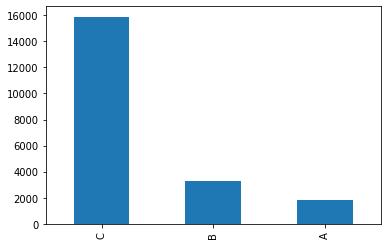

In [ ]:
stocks1_abc.value_counts().plot(kind='bar')

ABC анализ для VendorID = 2

In [ ]:
data2 = data[data['VendorID'] == 2]
data2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
15,2,2019-01-01 00:23:14,2019-01-01 00:25:40,1,0.38,1,N,170,170,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,NaN
16,2,2019-01-01 00:39:51,2019-01-01 00:48:02,1,0.55,1,N,170,170,1,6.5,0.5,0.5,1.95,0.0,0.3,9.75,NaN
17,2,2019-01-01 00:46:00,2019-01-01 00:49:07,1,0.30,1,N,107,107,1,4.0,0.5,0.5,1.06,0.0,0.3,6.36,NaN
18,2,2019-01-01 00:57:45,2019-01-01 01:03:51,1,1.42,1,N,170,141,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,NaN
19,2,2019-01-01 00:16:16,2019-01-01 00:25:57,1,1.72,1,N,41,247,2,9.0,0.5,0.5,0.00,0.0,0.3,10.30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667787,2,2019-01-31 23:57:36,2019-02-01 00:18:39,1,4.79,1,N,263,4,1,18.0,0.5,0.5,3.86,0.0,0.3,23.16,0.0
7667788,2,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.00,1,N,193,193,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.00,1,N,264,264,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,1,0.00,1,N,264,7,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0


In [ ]:
data2.groupby(['PULocationID','DOLocationID'])['total_amount'].sum().to_frame()

total_amount
PULocationID DOLocationID              
1            1                 23523.12
             132                 324.02
             137                  82.88
             142                  83.40
             164                   9.36
...                                 ...
265          259                  23.70
             262                  21.36
             263                  91.91
             264                1130.90
             265              147374.07

[29957 rows x 1 columns]

In [ ]:
summary2 = data2['total_amount'].sum()
summary2

73683189.13999996

In [ ]:
stocks2 = data2.groupby(['PULocationID','DOLocationID'])['total_amount'].sum() / summary2
stocks2.to_frame()

total_amount
PULocationID DOLocationID              
1            1             3.192468e-04
             132           4.397475e-06
             137           1.124816e-06
             142           1.131873e-06
             164           1.270303e-07
...                                 ...
265          259           3.216473e-07
             262           2.898897e-07
             263           1.247367e-06
             264           1.534814e-05
             265           2.000104e-03

[29957 rows x 1 columns]

In [ ]:
stocks2 = stocks2.sort_values(ascending=False)
stocks2 = stocks2[stocks2 >= 0.0]
stocks2

PULocationID  DOLocationID
264           264             0.007727
132           265             0.004423
138           230             0.004265
132           230             0.004239
237           236             0.003394
                                ...   
172           114             0.000000
264           11              0.000000
174           240             0.000000
205           264             0.000000
166           160             0.000000
Name: total_amount, Length: 29954, dtype: float64

In [ ]:
stocks2_cumsum = stocks2.cumsum()
stocks2_cumsum

PULocationID  DOLocationID
264           264             0.007727
132           265             0.012150
138           230             0.016415
132           230             0.020655
237           236             0.024049
                                ...   
172           114             1.000001
264           11              1.000001
174           240             1.000001
205           264             1.000001
166           160             1.000001
Name: total_amount, Length: 29954, dtype: float64

In [ ]:
def ABC_segmentation(perc):
  if perc < 0.8:
    return 'A'
  if perc >= 0.8 and perc < 0.95:
    return 'B'
  if perc >= 0.95:
    return 'C'


stocks2_abc = stocks2_cumsum.apply(ABC_segmentation)
stocks2_abc

PULocationID  DOLocationID
264           264             A
132           265             A
138           230             A
132           230             A
237           236             A
                             ..
172           114             C
264           11              C
174           240             C
205           264             C
166           160             C
Name: total_amount, Length: 29954, dtype: object

In [ ]:
stocks2_abc.value_counts()


C    23228
B     4593
A     2133
Name: total_amount, dtype: int64

In [ ]:
s2 = stocks2_abc.value_counts(normalize=True).to_frame().reset_index().rename(columns = {'index' : 'category'})
s2

,category,total_amount
0,C,0.775456
1,B,0.153335
2,A,0.071209


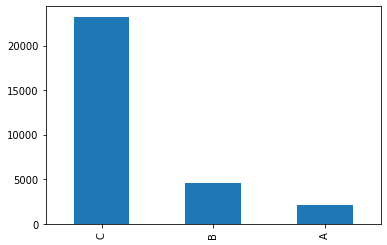

In [ ]:
stocks2_abc.value_counts().plot(kind='bar')

ABC анализ для VendorID = 4

In [ ]:
data4 = data[data['VendorID'] == 4]
data4

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1479,4,2019-01-01 00:29:38,2019-01-01 00:39:59,1,1.00,1,N,249,79,2,8.0,0.5,0.5,0.00,0.00,0.3,9.30,NaN
1480,4,2019-01-01 00:41:52,2019-01-01 00:46:30,1,0.70,1,N,107,107,1,5.0,0.5,0.5,1.89,0.00,0.3,8.19,NaN
1481,4,2019-01-01 00:52:26,2019-01-01 01:04:54,1,1.62,1,N,164,163,1,9.5,0.5,0.5,1.00,0.00,0.3,11.80,NaN
1641,4,2019-01-01 00:07:31,2019-01-01 00:11:35,1,0.73,1,N,79,4,2,5.0,0.5,0.5,0.00,0.00,0.3,6.30,NaN
1642,4,2019-01-01 00:15:16,2019-01-01 00:31:52,1,2.75,1,N,79,87,2,12.5,0.5,0.5,0.00,0.00,0.3,13.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667544,4,2019-01-31 23:44:07,2019-01-31 23:50:01,1,1.18,1,N,237,239,1,6.5,0.5,0.5,1.56,0.00,0.3,9.36,0.0
7667622,4,2019-01-31 23:47:47,2019-02-01 00:10:37,1,10.00,1,N,138,113,1,30.5,0.5,0.5,7.51,5.76,0.3,45.07,0.0
7667752,4,2019-01-31 23:39:13,2019-01-31 23:44:30,1,1.37,1,N,137,79,1,6.5,0.5,0.5,1.56,0.00,0.3,9.36,0.0
7667753,4,2019-01-31 23:56:06,2019-01-31 23:57:04,1,0.29,1,N,114,113,2,3.0,0.5,0.5,0.00,0.00,0.3,4.30,0.0


In [ ]:
data4.groupby(['PULocationID','DOLocationID'])['total_amount'].sum().to_frame()

total_amount
PULocationID DOLocationID              
1            1                   238.37
4            4                    33.32
             7                    34.80
             13                   19.56
             41                   33.96
...                                 ...
265          200                  42.50
             219                  33.46
             229                  95.80
             240                  10.80
             265                 797.30

[5673 rows x 1 columns]

In [ ]:
summary4 = data4['total_amount'].sum()
summary4

1138440.22

In [ ]:
stocks4 = data4.groupby(['PULocationID','DOLocationID'])['total_amount'].sum() / summary4
stocks4.to_frame()

total_amount
PULocationID DOLocationID              
1            1                 0.000209
4            4                 0.000029
             7                 0.000031
             13                0.000017
             41                0.000030
...                                 ...
265          200               0.000037
             219               0.000029
             229               0.000084
             240               0.000009
             265               0.000700

[5673 rows x 1 columns]

In [ ]:
stocks4 = stocks4.sort_values(ascending=False)
stocks4 = stocks4[stocks4 >= 0.0]
stocks4

PULocationID  DOLocationID
138           230             5.078211e-03
              161             4.556260e-03
237           236             4.325357e-03
138           162             3.681722e-03
236           237             3.310451e-03
                                  ...     
65            65              3.337900e-06
93            93              2.898703e-06
40            40              2.898703e-06
6             6               2.898703e-06
220           220             8.783948e-07
Name: total_amount, Length: 5673, dtype: float64

In [ ]:
stocks4_cumsum = stocks4.cumsum()
stocks4_cumsum

PULocationID  DOLocationID
138           230             0.005078
              161             0.009634
237           236             0.013960
138           162             0.017642
236           237             0.020952
                                ...   
65            65              0.999990
93            93              0.999993
40            40              0.999996
6             6               0.999999
220           220             1.000000
Name: total_amount, Length: 5673, dtype: float64

In [ ]:
def ABC_segmentation(perc):
  if perc < 0.8:
    return 'A'
  if perc >= 0.8 and perc < 0.95:
    return 'B'
  if perc >= 0.95:
    return 'C'


stocks4_abc = stocks4_cumsum.apply(ABC_segmentation)
stocks4_abc

PULocationID  DOLocationID
138           230             A
              161             A
237           236             A
138           162             A
236           237             A
                             ..
65            65              C
93            93              C
40            40              C
6             6               C
220           220             C
Name: total_amount, Length: 5673, dtype: object

In [ ]:
stocks4_abc.value_counts()


C    2097
B    1878
A    1698
Name: total_amount, dtype: int64

In [ ]:
s4 = stocks4_abc.value_counts(normalize=True).to_frame().reset_index().rename(columns = {'index' : 'category'})
s4

,category,total_amount
0,C,0.369646
1,B,0.331042
2,A,0.299313


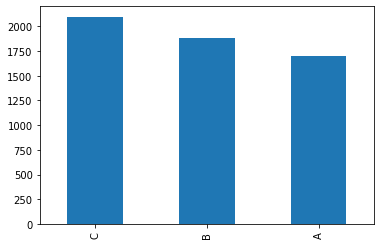

In [ ]:
 stocks4_abc.value_counts().plot(kind='bar')

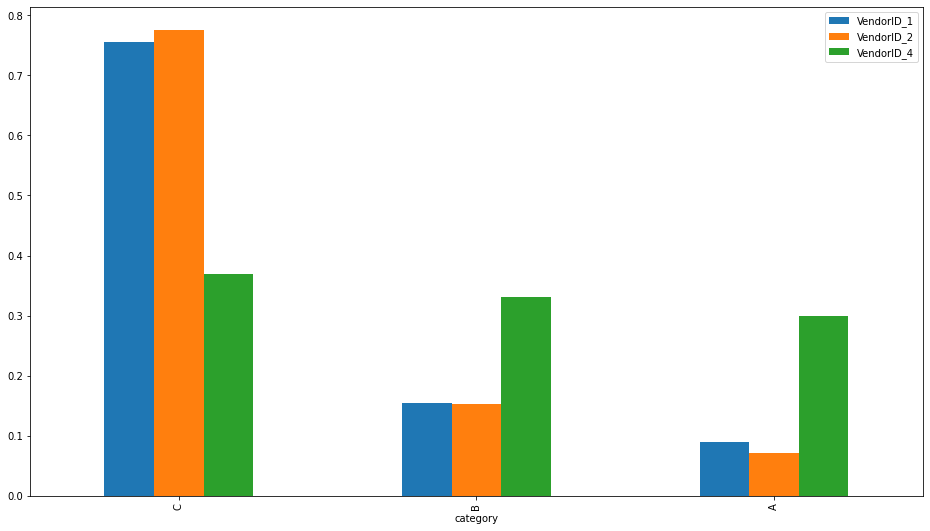

In [ ]:
gragh = pd.merge(s1, s2, on = 'category')
gragh = pd.merge(gragh, s4, on = 'category')
graph = gragh.rename(columns = {'total_amount_x' : 'VendorID_1','total_amount_y' : 'VendorID_2', 'total_amount' : 'VendorID_4'})
graph.plot.bar(figsize = (16,9), x='category')

Как видно из графика, результаты по оператору №4 существенно отличаются от результатов 1 и 2 операторов. У данного оператора поездки распределились практически равномерно по категориям ABC.

**XYZ анализ**

In [ ]:
data['week_number'] = data['tpep_pickup_datetime'].dt.week
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,week_number
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,1
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,1
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.30,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,NaN,1
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.70,1,N,229,7,1,13.5,0.5,0.5,3.70,0.0,0.3,18.50,NaN,1
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.10,1,N,141,234,1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667787,2,2019-01-31 23:57:36,2019-02-01 00:18:39,1,4.79,1,N,263,4,1,18.0,0.5,0.5,3.86,0.0,0.3,23.16,0.0,5
7667788,2,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.00,1,N,193,193,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,5
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.00,1,N,264,264,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,5
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,1,0.00,1,N,264,7,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,5


XYZ анализ для VendorID = 1

In [ ]:
data1 = data[data['VendorID'] == 1]
data1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,week_number
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,1
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,1
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,NaN,1
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,13.5,0.5,0.5,3.70,0.0,0.3,18.50,NaN,1
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667774,1,2019-01-31 23:58:24,2019-02-01 00:05:11,1,1.8,1,N,162,142,1,7.5,0.5,0.5,2.20,0.0,0.3,11.00,0.0,5
7667776,1,2019-01-31 23:13:16,2019-01-31 23:25:28,4,2.6,1,N,87,90,2,11.0,0.5,0.5,0.00,0.0,0.3,12.30,0.0,5
7667777,1,2019-01-31 23:32:28,2019-01-31 23:42:31,3,1.8,1,N,114,164,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35,0.0,5
7667778,1,2019-01-31 23:48:29,2019-01-31 23:58:06,2,2.0,1,N,164,229,1,9.0,0.5,0.5,1.03,0.0,0.3,11.33,0.0,5


In [ ]:
stocks_num1 = data1[['PULocationID','DOLocationID', 'week_number', 'tpep_pickup_datetime']]
orders1 = stocks_num1.groupby([ 'week_number', 'PULocationID','DOLocationID']).size()
orders1

week_number  PULocationID  DOLocationID
1            1             1                40
                           264               2
             2             65                1
                           107               1
             3             169               1
                                          ... 
5            265           130               1
                           164               1
                           231               1
                           264               6
                           265             192
Length: 63201, dtype: int64

In [ ]:
orders1 = orders1.reset_index().iloc[:,1:].rename({0: 'orders'}, axis=1)
orders1

,PULocationID,DOLocationID,orders
0,1,1,40
1,1,264,2
2,2,65,1
3,2,107,1
4,3,169,1
...,...,...,...
63196,265,130,1
63197,265,164,1
63198,265,231,1
63199,265,264,6


In [ ]:
orders_std1 = orders1.groupby(['PULocationID','DOLocationID']).std().dropna()
orders_std1

orders
PULocationID DOLocationID           
1            1             13.583078
             265            0.000000
3            200            0.000000
             233            0.957427
4            1              0.000000
...                              ...
265          191            0.000000
             203            0.000000
             231            1.140175
             264            2.073644
             265           32.805487

[14473 rows x 1 columns]

In [ ]:
orders_mean1 = orders1.groupby(['PULocationID','DOLocationID']).mean().dropna()
orders_mean1

orders
PULocationID DOLocationID        
1            1               38.0
             264              2.0
             265              1.0
2            65               1.0
             107              1.0
...                           ...
265          239              1.0
             249              1.0
             255              1.0
             264              3.4
             265            233.8

[21003 rows x 1 columns]

In [ ]:
volatility1 = (orders_std1 / orders_mean1).dropna()
volatility1

orders
PULocationID DOLocationID          
1            1             0.357449
             265           0.000000
3            200           0.000000
             233           0.348155
4            1             0.000000
...                             ...
265          191           0.000000
             203           0.000000
             231           0.475073
             264           0.609895
             265           0.140314

[14473 rows x 1 columns]

(array([3.281e+03, 3.471e+03, 4.742e+03, 1.759e+03, 9.190e+02, 2.540e+02,
        4.200e+01, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.16064387, 0.32128773, 0.4819316 , 0.64257546,
        0.80321933, 0.96386319, 1.12450706, 1.28515093, 1.44579479,
        1.60643866]),
 <a list of 10 Patch objects>)

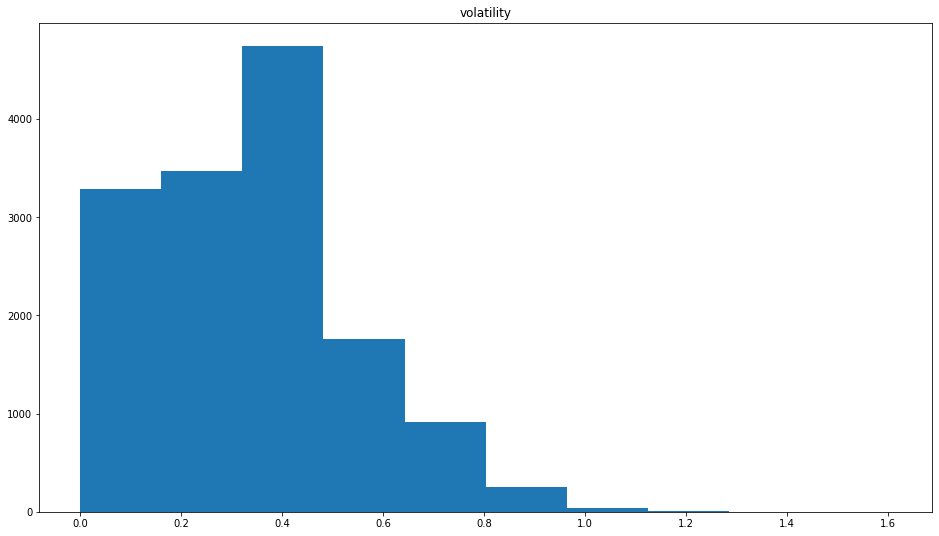

In [ ]:
plt.figure(figsize=(16,9))
plt.title('volatility')
plt.hist(volatility1['orders'])

На основе гистограммы определим 3 группы

*   X -> < 0.3
*   Y -> >= 0.3 and < 0.5
*   Z -> >= 0.5



In [ ]:
def XYZ_segmentation(vol):
  if vol < 0.3:
    return 'X'
  if vol >= 0.3 and vol < 0.5:
    return 'Y'
  if vol >= 0.5:
    return 'Z'

stocks1_xyz = volatility1['orders'].apply(XYZ_segmentation)
stocks1_xyz

PULocationID  DOLocationID
1             1               Y
              265             X
3             200             X
              233             Y
4             1               X
                             ..
265           191             X
              203             X
              231             Y
              264             Z
              265             X
Name: orders, Length: 14473, dtype: object

In [ ]:
stocks1_xyz.value_counts()

X    6276
Y    5392
Z    2805
Name: orders, dtype: int64

In [ ]:
s11 = stocks1_xyz.value_counts(normalize=True).to_frame().reset_index().rename(columns = {'index' : 'category'})
s11

,category,orders
0,X,0.433635
1,Y,0.372556
2,Z,0.193809


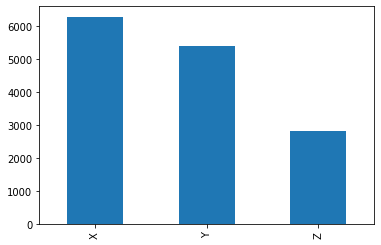

In [ ]:
stocks1_xyz.value_counts().plot(kind='bar')

XYZ анализ для VendorID = 2

In [ ]:
data2 = data[data['VendorID'] == 2]
data2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,week_number
15,2,2019-01-01 00:23:14,2019-01-01 00:25:40,1,0.38,1,N,170,170,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,NaN,1
16,2,2019-01-01 00:39:51,2019-01-01 00:48:02,1,0.55,1,N,170,170,1,6.5,0.5,0.5,1.95,0.0,0.3,9.75,NaN,1
17,2,2019-01-01 00:46:00,2019-01-01 00:49:07,1,0.30,1,N,107,107,1,4.0,0.5,0.5,1.06,0.0,0.3,6.36,NaN,1
18,2,2019-01-01 00:57:45,2019-01-01 01:03:51,1,1.42,1,N,170,141,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,NaN,1
19,2,2019-01-01 00:16:16,2019-01-01 00:25:57,1,1.72,1,N,41,247,2,9.0,0.5,0.5,0.00,0.0,0.3,10.30,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667787,2,2019-01-31 23:57:36,2019-02-01 00:18:39,1,4.79,1,N,263,4,1,18.0,0.5,0.5,3.86,0.0,0.3,23.16,0.0,5
7667788,2,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.00,1,N,193,193,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,5
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.00,1,N,264,264,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,5
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,1,0.00,1,N,264,7,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,5


In [ ]:
stocks_num2 = data2[['PULocationID','DOLocationID', 'week_number', 'tpep_pickup_datetime']]
orders2 = stocks_num2.groupby([ 'week_number', 'PULocationID','DOLocationID']).size()
orders2

week_number  PULocationID  DOLocationID
1            1             1               69
                           132              2
                           137              1
                           142              1
                           265              2
                                           ..
27           142           43               1
             246           50               1
30           148           234              1
33           114           181              1
36           148           79               1
Length: 90960, dtype: int64

In [ ]:
orders2 = orders2.reset_index().iloc[:,1:].rename({0: 'orders'}, axis=1)
orders2

,PULocationID,DOLocationID,orders
0,1,1,69
1,1,132,2
2,1,137,1
3,1,142,1
4,1,265,2
...,...,...,...
90955,142,43,1
90956,246,50,1
90957,148,234,1
90958,114,181,1


In [ ]:
orders_std2 = orders2.groupby(['PULocationID','DOLocationID']).std().dropna()
orders_std2

orders
PULocationID DOLocationID           
1            1             18.036075
             132            0.707107
             265            0.577350
2            2              0.000000
3            3              2.345208
...                              ...
265          259            0.000000
             262            0.000000
             263            0.547723
             264            0.500000
             265           52.347875

[21279 rows x 1 columns]

In [ ]:
orders_mean2 = orders2.groupby(['PULocationID','DOLocationID']).mean().dropna()
orders_mean2

orders
PULocationID DOLocationID        
1            1              46.60
             132             1.50
             137             1.00
             142             1.00
             164             1.00
...                           ...
265          259             2.00
             262             1.00
             263             1.40
             264             2.25
             265           370.40

[29957 rows x 1 columns]

In [ ]:
volatility2 = (orders_std2 / orders_mean2).dropna()
volatility2

orders
PULocationID DOLocationID          
1            1             0.387040
             132           0.471405
             265           0.346410
2            2             0.000000
3            3             0.781736
...                             ...
265          259           0.000000
             262           0.000000
             263           0.391230
             264           0.222222
             265           0.141328

[21279 rows x 1 columns]

(array([4755., 2645., 4028., 5832., 1934., 1522.,  424.,  104.,   29.,
           6.]),
 array([0.        , 0.12643731, 0.25287463, 0.37931194, 0.50574926,
        0.63218657, 0.75862389, 0.8850612 , 1.01149852, 1.13793583,
        1.26437315]),
 <a list of 10 Patch objects>)

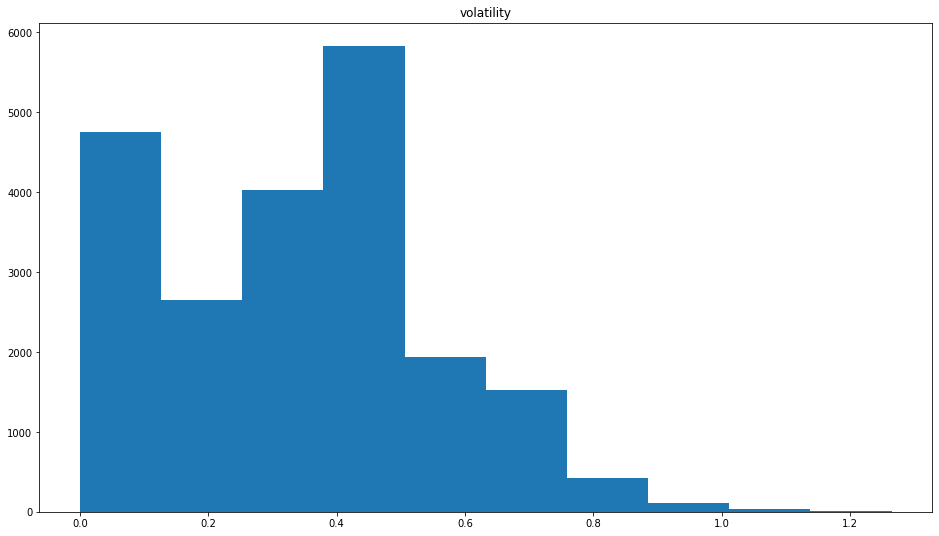

In [ ]:
plt.figure(figsize=(16,9))
plt.title('volatility')
plt.hist(volatility2['orders'])

На основе гистограммы определим 3 группы

* X -> < 0.3
* Y -> >= 0.3 and < 0.5
* Z -> >= 0.5

In [ ]:
def XYZ_segmentation(vol):
  if vol < 0.3:
    return 'X'
  if vol >= 0.3 and vol < 0.5:
    return 'Y'
  if vol >= 0.5:
    return 'Z'

stocks2_xyz = volatility2['orders'].apply(XYZ_segmentation)
stocks2_xyz

PULocationID  DOLocationID
1             1               Y
              132             Y
              265             Y
2             2               X
3             3               Z
                             ..
265           259             X
              262             X
              263             Y
              264             X
              265             X
Name: orders, Length: 21279, dtype: object

In [ ]:
stocks2_xyz.value_counts()

X    8960
Y    7888
Z    4431
Name: orders, dtype: int64

In [ ]:
s22 = stocks2_xyz.value_counts(normalize=True).to_frame().reset_index().rename(columns = {'index' : 'category'})
s22

,category,orders
0,X,0.421072
1,Y,0.370694
2,Z,0.208233


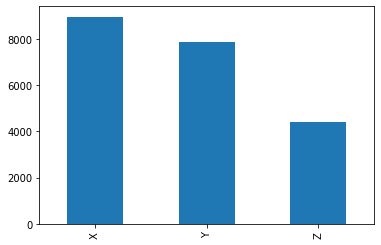

In [ ]:
stocks2_xyz.value_counts().plot(kind='bar')

XYZ анализ для VendorID = 4

In [ ]:
data4 = data[data['VendorID'] == 4]
data4

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1479,4,2019-01-01 00:29:38,2019-01-01 00:39:59,1,1.00,1,N,249,79,2,8.0,0.5,0.5,0.00,0.00,0.3,9.30,NaN
1480,4,2019-01-01 00:41:52,2019-01-01 00:46:30,1,0.70,1,N,107,107,1,5.0,0.5,0.5,1.89,0.00,0.3,8.19,NaN
1481,4,2019-01-01 00:52:26,2019-01-01 01:04:54,1,1.62,1,N,164,163,1,9.5,0.5,0.5,1.00,0.00,0.3,11.80,NaN
1641,4,2019-01-01 00:07:31,2019-01-01 00:11:35,1,0.73,1,N,79,4,2,5.0,0.5,0.5,0.00,0.00,0.3,6.30,NaN
1642,4,2019-01-01 00:15:16,2019-01-01 00:31:52,1,2.75,1,N,79,87,2,12.5,0.5,0.5,0.00,0.00,0.3,13.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667544,4,2019-01-31 23:44:07,2019-01-31 23:50:01,1,1.18,1,N,237,239,1,6.5,0.5,0.5,1.56,0.00,0.3,9.36,0.0
7667622,4,2019-01-31 23:47:47,2019-02-01 00:10:37,1,10.00,1,N,138,113,1,30.5,0.5,0.5,7.51,5.76,0.3,45.07,0.0
7667752,4,2019-01-31 23:39:13,2019-01-31 23:44:30,1,1.37,1,N,137,79,1,6.5,0.5,0.5,1.56,0.00,0.3,9.36,0.0
7667753,4,2019-01-31 23:56:06,2019-01-31 23:57:04,1,0.29,1,N,114,113,2,3.0,0.5,0.5,0.00,0.00,0.3,4.30,0.0


In [ ]:
stocks_num4 = data4[['PULocationID','DOLocationID', 'week_number', 'tpep_pickup_datetime']]
orders4 = stocks_num4.groupby([ 'week_number', 'PULocationID','DOLocationID']).size()
orders4

In [ ]:
orders4 = orders4.reset_index().iloc[:,1:].rename({0: 'orders'}, axis=1)
orders4

,PULocationID,DOLocationID,orders
0,4,7,1
1,4,79,4
2,4,107,1
3,4,114,1
4,4,137,1
...,...,...,...
15531,263,238,3
15532,263,239,3
15533,263,262,18
15534,263,263,9


In [ ]:
orders_std4 = orders4.groupby(['PULocationID','DOLocationID']).std().dropna()
orders_std4

orders
PULocationID DOLocationID          
1            1             0.707107
4            4             2.828427
             68            0.000000
             79            1.816590
             87            0.000000
...                             ...
263          260           0.000000
             262           4.159327
             263           9.964939
265          200           0.577350
             265           1.816590

[3605 rows x 1 columns]

In [ ]:
orders_mean4 = orders4.groupby(['PULocationID','DOLocationID']).mean().dropna()
orders_mean4

orders
PULocationID DOLocationID          
1            1             1.500000
4            4             3.000000
             7             1.000000
             13            1.000000
             41            1.000000
...                             ...
265          200           1.666667
             219           2.000000
             229           1.000000
             240           1.000000
             265           2.600000

[5673 rows x 1 columns]

In [ ]:
volatility4 = (orders_std4 / orders_mean4).dropna()
volatility4

orders
PULocationID DOLocationID          
1            1             0.471405
4            4             0.942809
             68            0.000000
             79            0.698689
             87            0.000000
...                             ...
263          260           0.000000
             262           0.192561
             263           0.422243
265          200           0.346410
             265           0.698689

[3605 rows x 1 columns]

(array([ 828.,  161.,  511., 1105.,  468.,  355.,   97.,   59.,   18.,
           3.]),
 array([0.        , 0.12124356, 0.24248711, 0.36373067, 0.48497423,
        0.60621778, 0.72746134, 0.8487049 , 0.96994845, 1.09119201,
        1.21243557]),
 <a list of 10 Patch objects>)

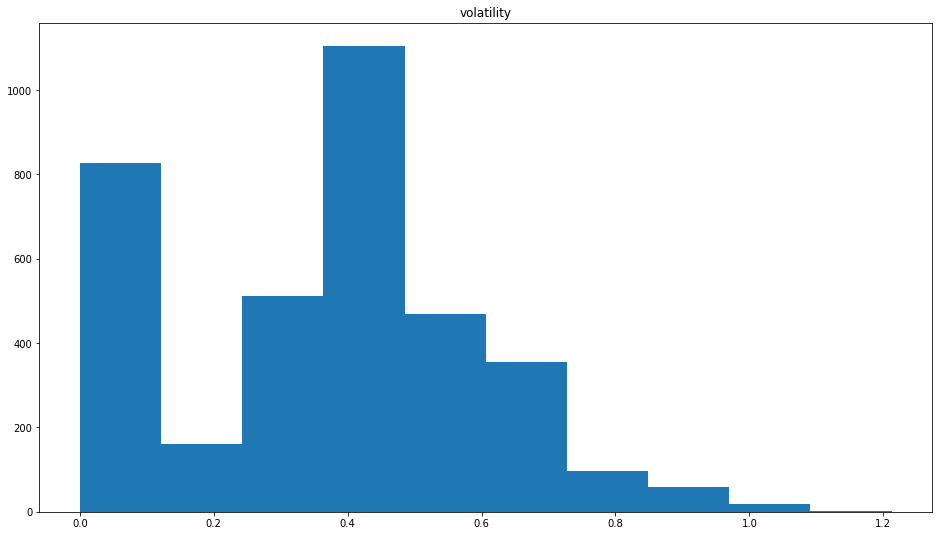

In [ ]:
plt.figure(figsize=(16,9))
plt.title('volatility')
plt.hist(volatility4['orders'])

На основе гистограммы определим 3 группы

* X -> < 0.3
* Y -> >= 0.3 and < 0.5
* Z -> >= 0.5

In [ ]:
def XYZ_segmentation(vol):
  if vol < 0.3:
    return 'X'
  if vol >= 0.3 and vol < 0.5:
    return 'Y'
  if vol >= 0.5:
    return 'Z'

stocks4_xyz = volatility4['orders'].apply(XYZ_segmentation)
stocks4_xyz

PULocationID  DOLocationID
1             1               Y
4             4               Z
              68              X
              79              Z
              87              X
                             ..
263           260             X
              262             X
              263             Y
265           200             Y
              265             Z
Name: orders, Length: 3605, dtype: object

In [ ]:
stocks4_xyz.value_counts()

Y    1465
X    1185
Z     955
Name: orders, dtype: int64

In [ ]:
s44 = stocks4_xyz.value_counts(normalize=True).to_frame().reset_index().rename(columns = {'index' : 'category'})
s44

,category,orders
0,Y,0.40638
1,X,0.32871
2,Z,0.26491


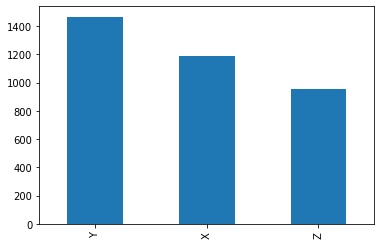

In [ ]:
stocks4_xyz.value_counts().plot(kind='bar')

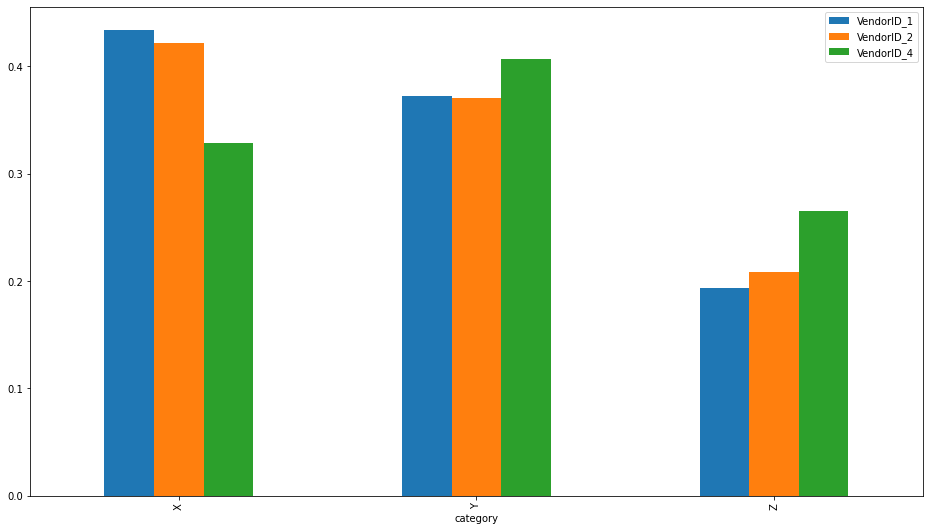

In [ ]:
graghx = pd.merge(s11, s22, on = 'category')
graghx = pd.merge(graghx, s44, on = 'category')
graphx = graghx.rename(columns = {'orders_x' : 'VendorID_1','orders_y' : 'VendorID_2', 'orders' : 'VendorID_4'})
graphx.plot.bar(figsize = (16,9), x='category')

В данном случае, результаты по оператору №4 также отличаются от результатов 1 и 2 операторов.

**Статистика**

Выделим отдельный столбец с временем поездки

In [ ]:
data['travel_time'] = ((data['tpep_dropoff_datetime']-data['tpep_pickup_datetime']).dt.total_seconds()/60).astype(float).round(2)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,travel_time
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,6.67
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,19.20
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.30,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,NaN,7.15
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.70,1,N,229,7,1,13.5,0.5,0.5,3.70,0.0,0.3,18.50,NaN,13.63
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.10,1,N,141,234,1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,NaN,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667787,2,2019-01-31 23:57:36,2019-02-01 00:18:39,1,4.79,1,N,263,4,1,18.0,0.5,0.5,3.86,0.0,0.3,23.16,0.0,21.05
7667788,2,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.00,1,N,193,193,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,1.13
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.00,1,N,264,264,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.07
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,1,0.00,1,N,264,7,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.45


Найдём одинаковую локацию посадки и высадки для первого оператора такси

In [ ]:
data1 = data[(data['PULocationID'] == data['DOLocationID']) & (data['VendorID'] == 1)]
data1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,travel_time
86,1,2019-01-01 00:48:53,2019-01-01 00:54:44,1,0.5,1,N,239,239,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15,NaN,5.85
103,1,2019-01-01 00:50:41,2019-01-01 01:00:04,2,1.3,1,N,264,264,1,7.5,0.5,0.5,1.58,0.0,0.3,10.38,NaN,9.38
113,1,2019-01-01 00:32:20,2019-01-01 00:43:43,1,0.2,1,Y,186,186,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30,NaN,11.38
151,1,2019-01-01 00:21:23,2019-01-01 00:26:07,2,0.4,1,N,233,233,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,4.73
156,1,2019-01-01 00:32:24,2019-01-01 00:33:21,0,5.3,1,N,50,50,1,2.5,0.5,0.5,0.75,0.0,0.3,4.55,NaN,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667692,1,2019-01-31 23:42:09,2019-01-31 23:43:46,1,0.3,1,N,264,264,1,3.0,0.5,0.5,0.85,0.0,0.3,5.15,0.0,1.62
7667693,1,2019-01-31 23:45:29,2019-02-01 00:11:47,1,5.6,1,N,264,264,1,21.5,0.5,0.5,4.55,0.0,0.3,27.35,0.0,26.30
7667699,1,2019-01-31 23:48:38,2019-02-01 00:13:19,2,6.9,1,N,264,264,1,24.0,0.5,0.5,4.00,0.0,0.3,29.30,0.0,24.68
7667714,1,2019-01-31 23:07:58,2019-01-31 23:08:07,1,5.8,1,N,223,223,3,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,0.15


In [ ]:
data1.head(15)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,travel_time
86,1,2019-01-01 00:48:53,2019-01-01 00:54:44,1,0.5,1,N,239,239,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15,NaN,5.85
103,1,2019-01-01 00:50:41,2019-01-01 01:00:04,2,1.3,1,N,264,264,1,7.5,0.5,0.5,1.58,0.0,0.3,10.38,NaN,9.38
113,1,2019-01-01 00:32:20,2019-01-01 00:43:43,1,0.2,1,Y,186,186,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30,NaN,11.38
151,1,2019-01-01 00:21:23,2019-01-01 00:26:07,2,0.4,1,N,233,233,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,4.73
156,1,2019-01-01 00:32:24,2019-01-01 00:33:21,0,5.3,1,N,50,50,1,2.5,0.5,0.5,0.75,0.0,0.3,4.55,NaN,0.95
158,1,2019-01-01 00:44:29,2019-01-01 00:48:05,3,0.6,1,N,238,238,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,3.60
176,1,2019-01-01 00:59:13,2019-01-01 01:01:44,6,0.5,1,N,161,161,3,4.0,0.5,0.5,0.00,0.0,0.3,5.30,NaN,2.52
182,1,2019-01-01 00:11:00,2019-01-01 00:15:28,1,0.8,1,N,79,79,1,5.0,0.5,0.5,1.26,0.0,0.3,7.56,NaN,4.47
190,1,2019-01-01 00:31:12,2019-01-01 00:38:08,1,0.7,1,Y,148,148,1,6.0,0.5,0.5,1.80,0.0,0.3,9.10,NaN,6.93
217,1,2019-01-01 00:12:29,2019-01-01 00:14:25,2,0.5,1,N,236,236,1,4.0,0.5,0.5,1.55,0.0,0.3,6.85,NaN,1.93


Возьмём для примера зону с id 264

In [ ]:
data264 = data1[data1['PULocationID'] == 264]
data264

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,travel_time
103,1,2019-01-01 00:50:41,2019-01-01 01:00:04,2,1.3,1,N,264,264,1,7.5,0.5,0.5,1.58,0.0,0.3,10.38,NaN,9.38
354,1,2019-01-01 00:09:18,2019-01-01 00:25:55,3,2.9,1,N,264,264,2,12.5,0.5,0.5,0.00,0.0,0.3,13.80,NaN,16.62
355,1,2019-01-01 00:43:45,2019-01-01 00:57:10,2,1.3,1,N,264,264,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80,NaN,13.42
356,1,2019-01-01 00:59:04,2019-01-01 01:33:29,2,7.0,1,N,264,264,2,27.5,0.5,0.5,0.00,0.0,0.3,28.80,NaN,34.42
576,1,2019-01-01 00:23:47,2019-01-01 00:35:19,1,0.7,1,N,264,264,2,8.0,0.0,0.5,0.00,0.0,0.3,8.80,NaN,11.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667691,1,2019-01-31 23:23:13,2019-01-31 23:40:56,4,3.1,1,N,264,264,1,13.5,0.5,0.5,2.95,0.0,0.3,17.75,0.0,17.72
7667692,1,2019-01-31 23:42:09,2019-01-31 23:43:46,1,0.3,1,N,264,264,1,3.0,0.5,0.5,0.85,0.0,0.3,5.15,0.0,1.62
7667693,1,2019-01-31 23:45:29,2019-02-01 00:11:47,1,5.6,1,N,264,264,1,21.5,0.5,0.5,4.55,0.0,0.3,27.35,0.0,26.30
7667699,1,2019-01-31 23:48:38,2019-02-01 00:13:19,2,6.9,1,N,264,264,1,24.0,0.5,0.5,4.00,0.0,0.3,29.30,0.0,24.68


Найдём одинаковую локацию посадки и высадки для второго оператора такси

In [ ]:
data2 = data[(data['PULocationID'] == data['DOLocationID']) & (data['VendorID'] == 2)]
data2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,travel_time
15,2,2019-01-01 00:23:14,2019-01-01 00:25:40,1,0.38,1,N,170,170,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,NaN,2.43
16,2,2019-01-01 00:39:51,2019-01-01 00:48:02,1,0.55,1,N,170,170,1,6.5,0.5,0.5,1.95,0.0,0.3,9.75,NaN,8.18
17,2,2019-01-01 00:46:00,2019-01-01 00:49:07,1,0.30,1,N,107,107,1,4.0,0.5,0.5,1.06,0.0,0.3,6.36,NaN,3.12
64,2,2019-01-01 00:53:19,2019-01-01 01:10:04,2,0.74,1,N,68,68,2,11.0,0.5,0.5,0.00,0.0,0.3,12.30,NaN,16.75
145,2,2019-01-01 00:14:19,2019-01-01 00:17:03,2,0.78,1,N,236,236,1,4.5,0.5,0.5,1.16,0.0,0.3,6.96,NaN,2.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667686,2,2019-01-31 23:56:28,2019-02-01 00:06:17,1,1.02,1,N,137,137,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80,0.0,9.82
7667755,2,2019-01-31 23:14:04,2019-01-31 23:18:14,3,0.76,1,N,162,162,1,5.0,0.5,0.5,1.58,0.0,0.3,7.88,0.0,4.17
7667788,2,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.00,1,N,193,193,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,1.13
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.00,1,N,264,264,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.07


И также возьмём зону с id 264

In [ ]:
data2642 = data2[data2['PULocationID'] == 264]
data2642

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,travel_time
1473,2,2019-01-01 00:22:42,2019-01-01 00:49:27,2,4.59,1,N,264,264,1,19.5,0.5,0.5,4.00,0.00,0.3,24.80,NaN,26.75
2450,2,2019-01-01 00:26:27,2019-01-01 00:40:52,1,1.60,1,N,264,264,2,10.0,0.5,0.5,0.00,0.00,0.3,11.30,NaN,14.42
2772,2,2019-01-01 00:26:16,2019-01-01 00:32:05,2,1.39,1,N,264,264,1,6.0,0.5,0.5,1.46,0.00,0.3,8.76,NaN,5.82
3151,2,2019-01-01 00:10:37,2019-01-01 00:23:48,6,5.03,1,N,264,264,1,17.0,0.5,0.5,3.66,0.00,0.3,21.96,NaN,13.18
3152,2,2019-01-01 00:28:45,2019-01-01 00:40:33,6,3.24,1,N,264,264,1,11.5,0.5,0.5,2.56,0.00,0.3,15.36,NaN,11.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666917,2,2019-01-31 23:09:00,2019-01-31 23:25:18,1,7.67,1,N,264,264,1,23.0,0.5,0.5,6.01,5.76,0.3,36.07,0.0,16.30
7667064,2,2019-01-31 23:55:40,2019-02-01 00:34:49,1,17.22,1,N,264,264,2,49.5,0.5,0.5,0.00,5.76,0.3,56.56,0.0,39.15
7667169,2,2019-01-31 23:44:10,2019-02-01 00:20:45,1,20.43,1,N,264,264,1,57.0,0.5,0.5,11.66,0.00,0.3,69.96,0.0,36.58
7667277,2,2019-01-31 23:48:17,2019-02-01 00:12:37,1,17.38,2,N,264,264,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,0.0,24.33


Проверим истинность гипотезы о равенстве среднего времени для выбранных маршрутов с помощью t критерия и pvalue (модуль stats)

In [ ]:
import scipy.stats as sts

In [ ]:
sts.ttest_ind(data264['travel_time'].sample(n=3000), data2642['travel_time'].sample(n=3000))

Ttest_indResult(statistic=-5.147024269707084, pvalue=2.7307604625657667e-07)

p-value мало, поэтому отвергаем нулевую гипотезу о равенстве среднего времени поездок

Повторим вышеописанные действия для ещё 4-ёх примеров

In [ ]:
data239 = data1[data1['PULocationID'] == 239]
data239

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,travel_time
86,1,2019-01-01 00:48:53,2019-01-01 00:54:44,1,0.5,1,N,239,239,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15,NaN,5.85
432,1,2019-01-01 00:35:01,2019-01-01 00:37:21,1,0.3,1,Y,239,239,2,4.0,0.5,0.5,0.00,0.0,0.3,5.30,NaN,2.33
1231,1,2019-01-01 00:54:43,2019-01-01 00:59:06,2,0.7,1,N,239,239,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30,NaN,4.38
5537,1,2019-01-01 00:54:45,2019-01-01 00:57:58,1,0.8,1,N,239,239,1,4.5,0.5,0.5,1.00,0.0,0.3,6.80,NaN,3.22
5687,1,2019-01-01 00:47:35,2019-01-01 00:52:48,2,0.9,1,N,239,239,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,NaN,5.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661621,1,2019-01-31 23:06:09,2019-01-31 23:09:11,2,0.6,1,N,239,239,1,4.5,0.5,0.5,1.10,0.0,0.3,6.90,0.0,3.03
7661622,1,2019-01-31 23:14:05,2019-01-31 23:16:13,1,0.6,1,N,239,239,1,4.0,0.5,0.5,2.00,0.0,0.3,7.30,0.0,2.13
7662349,1,2019-01-31 23:58:52,2019-02-01 00:00:54,2,0.4,1,N,239,239,1,3.5,0.5,0.5,1.00,0.0,0.3,5.80,0.0,2.03
7663342,1,2019-01-31 23:29:39,2019-01-31 23:33:09,1,0.7,1,N,239,239,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30,0.0,3.50


In [ ]:
data2392 = data2[data2['PULocationID'] == 239]
data2392

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,travel_time
197,2,2019-01-01 00:06:30,2019-01-01 00:08:31,1,0.46,1,N,239,239,1,4.0,0.5,0.5,1.59,0.00,0.3,6.89,NaN,2.02
406,2,2019-01-01 00:16:59,2019-01-01 00:20:06,1,0.36,1,N,239,239,2,4.0,0.5,0.5,0.00,0.00,0.3,5.30,NaN,3.12
1357,2,2019-01-01 00:31:13,2019-01-01 00:34:54,6,0.30,1,N,239,239,2,4.5,0.5,0.5,0.00,0.00,0.3,5.80,NaN,3.68
1484,2,2019-01-01 00:56:54,2019-01-01 01:00:37,1,0.59,1,N,239,239,2,4.5,0.5,0.5,0.00,0.00,0.3,5.80,NaN,3.72
2433,2,2019-01-01 00:05:49,2019-01-01 00:05:53,2,0.02,1,N,239,239,2,2.5,0.5,0.5,0.00,0.00,0.3,3.80,NaN,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661745,2,2019-01-31 23:27:55,2019-01-31 23:30:26,3,0.43,1,N,239,239,1,4.0,0.5,0.5,1.00,0.00,0.3,6.30,0.0,2.52
7663222,2,2019-01-31 23:42:53,2019-01-31 23:43:57,1,0.29,1,N,239,239,2,3.0,0.5,0.5,0.00,0.00,0.3,4.30,0.0,1.07
7664554,2,2019-01-31 23:32:23,2019-01-31 23:34:26,1,0.27,1,N,239,239,1,3.5,0.5,0.5,0.96,0.00,0.3,5.76,0.0,2.05
7665237,2,2019-01-31 23:35:59,2019-01-31 23:36:10,5,0.00,2,N,239,239,1,52.0,0.0,0.5,12.00,5.76,0.3,70.56,0.0,0.18


In [ ]:
sts.ttest_ind(data239['travel_time'].sample(n=3000), data2392['travel_time'].sample(n=3000))

Ttest_indResult(statistic=-2.6034082261129634, pvalue=0.009252934198512152)

p-value мало, поэтому отвергаем нулевую гипотезу о равенстве среднего времени поездок

In [ ]:
data170 = data1[data1['PULocationID'] == 170]
data170

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,travel_time
1865,1,2019-01-01 00:12:30,2019-01-01 00:13:56,3,0.4,1,N,170,170,1,3.5,0.5,0.5,0.95,0.0,0.3,5.75,NaN,1.43
2923,1,2019-01-01 00:17:40,2019-01-01 00:22:23,3,0.4,1,N,170,170,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30,NaN,4.72
3163,1,2019-01-01 00:22:04,2019-01-01 00:26:56,3,0.6,1,N,170,170,1,5.0,0.5,0.5,1.85,0.0,0.3,8.15,NaN,4.87
3982,1,2019-01-01 00:51:57,2019-01-01 00:56:44,2,0.4,1,N,170,170,1,5.0,0.5,0.5,1.00,0.0,0.3,7.30,NaN,4.78
5561,1,2019-01-01 00:35:38,2019-01-01 00:39:18,1,0.5,1,N,170,170,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7654773,1,2019-01-31 22:39:34,2019-01-31 22:47:37,1,0.7,1,N,170,170,1,6.5,0.5,0.5,1.00,0.0,0.3,8.80,0.0,8.05
7657407,1,2019-01-31 23:56:37,2019-01-31 23:56:41,1,1.7,1,N,170,170,3,8.5,0.5,0.5,0.00,0.0,0.3,9.80,0.0,0.07
7659117,1,2019-01-31 23:43:00,2019-01-31 23:46:59,1,0.6,1,N,170,170,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,0.0,3.98
7660209,1,2019-01-31 23:44:22,2019-01-31 23:48:13,1,0.5,1,N,170,170,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95,0.0,3.85


In [ ]:
data1702 = data2[data2['PULocationID'] == 170]
data1702

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,travel_time
15,2,2019-01-01 00:23:14,2019-01-01 00:25:40,1,0.38,1,N,170,170,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,NaN,2.43
16,2,2019-01-01 00:39:51,2019-01-01 00:48:02,1,0.55,1,N,170,170,1,6.5,0.5,0.5,1.95,0.0,0.3,9.75,NaN,8.18
2003,2,2019-01-01 00:51:38,2019-01-01 00:58:41,5,0.61,1,N,170,170,1,6.0,0.5,0.5,0.00,0.0,0.3,7.30,NaN,7.05
2339,2,2019-01-01 00:14:34,2019-01-01 00:17:39,1,0.34,1,N,170,170,1,4.0,0.5,0.5,1.06,0.0,0.3,6.36,NaN,3.08
2914,2,2019-01-01 00:28:58,2019-01-01 00:34:45,1,0.53,1,N,170,170,1,5.0,0.5,0.5,0.94,0.0,0.3,7.24,NaN,5.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7658845,2,2019-01-31 23:02:50,2019-01-31 23:02:59,1,0.00,5,N,170,170,1,10.0,0.0,0.5,1.00,0.0,0.3,11.80,0.0,0.15
7659364,2,2019-01-31 23:19:24,2019-01-31 23:19:59,1,0.11,1,N,170,170,3,-2.5,-0.5,-0.5,0.00,0.0,-0.3,-3.80,0.0,0.58
7659365,2,2019-01-31 23:19:24,2019-01-31 23:19:59,1,0.11,1,N,170,170,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,0.58
7662879,2,2019-01-31 23:58:22,2019-02-01 00:00:12,1,0.44,1,N,170,170,1,3.5,0.5,0.5,0.96,0.0,0.3,5.76,0.0,1.83


In [ ]:
sts.ttest_ind(data170['travel_time'].sample(n=3000), data1702['travel_time'].sample(n=3000))

Ttest_indResult(statistic=-2.20591708561509, pvalue=0.027427583335942866)

p-value меньше 0,05, поэтому отвергаем нулевую гипотезу о равенстве среднего времени поездок

In [ ]:
data161 = data1[data1['PULocationID'] == 161]
data161

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,travel_time
176,1,2019-01-01 00:59:13,2019-01-01 01:01:44,6,0.5,1,N,161,161,3,4.0,0.5,0.5,0.00,0.0,0.3,5.30,NaN,2.52
458,1,2019-01-01 00:24:29,2019-01-01 00:40:16,1,0.4,1,N,161,161,1,10.0,0.5,0.5,3.35,0.0,0.3,14.65,NaN,15.78
459,1,2019-01-01 00:42:45,2019-01-01 00:44:12,1,0.0,1,N,161,161,3,3.0,0.5,0.5,0.00,0.0,0.3,4.30,NaN,1.45
845,1,2019-01-01 00:41:58,2019-01-01 00:44:05,1,0.0,1,N,161,161,3,3.5,0.5,0.5,0.00,0.0,0.3,4.80,NaN,2.12
3169,1,2019-01-01 00:26:48,2019-01-01 00:35:47,3,0.5,1,N,161,161,2,7.0,0.5,0.5,0.00,0.0,0.3,8.30,NaN,8.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661908,1,2019-01-31 23:45:00,2019-01-31 23:50:01,1,0.7,1,N,161,161,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15,0.0,5.02
7662044,1,2019-01-31 23:11:07,2019-01-31 23:13:39,1,0.5,1,N,161,161,1,4.0,0.5,0.5,1.30,0.0,0.3,6.60,0.0,2.53
7662386,1,2019-01-31 23:37:58,2019-01-31 23:40:07,1,0.8,1,N,161,161,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95,0.0,2.15
7662996,1,2019-01-31 23:19:26,2019-01-31 23:24:32,2,0.9,1,N,161,161,2,5.5,0.5,0.5,0.00,0.0,0.3,6.80,0.0,5.10


In [ ]:
data1612 = data2[data2['PULocationID'] == 161]
data1612

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,travel_time
1417,2,2019-01-01 00:12:40,2019-01-01 00:18:03,1,0.49,1,N,161,161,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30,NaN,5.38
3183,2,2019-01-01 00:19:27,2019-01-01 00:20:01,1,0.00,1,N,161,161,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,NaN,0.57
3784,2,2019-01-01 00:57:20,2019-01-01 01:03:57,1,0.50,1,N,161,161,2,5.5,0.5,0.5,0.00,0.0,0.3,6.80,NaN,6.62
3911,2,2019-01-01 00:13:22,2019-01-01 00:19:14,1,0.30,1,N,161,161,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30,NaN,5.87
7419,2,2019-01-01 00:20:00,2019-01-01 00:25:35,1,0.19,1,N,161,161,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,5.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661576,2,2019-01-31 23:22:14,2019-01-31 23:26:03,1,0.74,1,N,161,161,1,4.5,0.5,0.5,2.00,0.0,0.3,7.80,0.0,3.82
7663847,2,2019-01-31 23:04:22,2019-01-31 23:12:26,1,1.19,1,N,161,161,1,7.5,0.5,0.5,1.58,0.0,0.3,10.38,0.0,8.07
7664122,2,2019-01-31 23:52:01,2019-01-31 23:53:01,2,0.23,1,N,161,161,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,1.00
7665121,2,2019-01-31 23:38:56,2019-01-31 23:45:28,1,0.93,1,N,161,161,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,0.0,6.53


In [ ]:
sts.ttest_ind(data161['travel_time'].sample(n=3000), data1612['travel_time'].sample(n=3000))

Ttest_indResult(statistic=-2.6272245373987606, pvalue=0.008630355856546812)

p-value мало, поэтому отвергаем нулевую гипотезу о равенстве среднего времени поездок

In [ ]:
data141 = data1[data1['PULocationID'] == 141]
data141

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,travel_time
263,1,2019-01-01 00:08:36,2019-01-01 00:13:09,1,0.8,1,N,141,141,1,5.0,0.5,0.5,1.25,0.0,0.3,7.55,NaN,4.55
499,1,2019-01-01 00:44:06,2019-01-01 00:45:31,2,0.4,1,N,141,141,1,3.5,0.5,0.5,0.95,0.0,0.3,5.75,NaN,1.42
593,1,2019-01-01 00:17:34,2019-01-01 00:21:11,1,0.4,1,N,141,141,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,3.62
961,1,2019-01-01 00:28:41,2019-01-01 00:31:16,3,0.4,1,N,141,141,1,4.0,0.5,0.5,0.26,0.0,0.3,5.56,NaN,2.58
2553,1,2019-01-01 00:29:46,2019-01-01 00:40:11,3,2.0,1,N,141,141,2,9.0,0.5,0.5,0.00,0.0,0.3,10.30,NaN,10.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7649827,1,2019-01-31 22:15:17,2019-01-31 22:17:40,1,0.6,1,N,141,141,1,4.5,0.5,0.5,1.00,0.0,0.3,6.80,0.0,2.38
7652567,1,2019-01-31 22:19:17,2019-01-31 22:21:02,1,0.5,1,N,141,141,1,3.5,0.5,0.5,2.00,0.0,0.3,6.80,0.0,1.75
7655552,1,2019-01-31 22:18:14,2019-01-31 22:21:36,1,0.4,1,N,141,141,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95,0.0,3.37
7659394,1,2019-01-31 23:47:39,2019-01-31 23:56:20,1,0.5,1,N,141,141,2,7.0,0.5,0.5,0.00,0.0,0.3,8.30,0.0,8.68


In [ ]:
data1412 = data2[data2['PULocationID'] == 141]
data1412

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,travel_time
1791,2,2019-01-01 00:10:19,2019-01-01 00:13:18,2,0.96,1,N,141,141,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30,NaN,2.98
2444,2,2019-01-01 00:57:01,2019-01-01 01:03:08,2,1.00,1,N,141,141,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,NaN,6.12
2489,2,2019-01-01 00:30:23,2019-01-01 00:34:41,1,1.00,1,N,141,141,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,NaN,4.30
2804,2,2019-01-01 00:25:55,2019-01-01 00:30:06,2,0.74,1,N,141,141,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30,NaN,4.18
2852,2,2019-01-01 00:57:18,2019-01-01 01:01:34,2,0.75,1,N,141,141,1,5.0,0.5,0.5,0.94,0.0,0.3,7.24,NaN,4.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7662092,2,2019-01-31 23:15:21,2019-01-31 23:22:03,1,0.98,1,N,141,141,1,6.5,0.5,0.5,1.00,0.0,0.3,8.80,0.0,6.70
7664810,2,2019-01-31 23:42:27,2019-01-31 23:47:00,1,0.75,1,N,141,141,1,5.0,0.5,0.5,1.26,0.0,0.3,7.56,0.0,4.55
7665541,2,2019-01-31 23:30:10,2019-01-31 23:32:48,1,0.78,1,N,141,141,1,4.5,0.5,0.5,1.45,0.0,0.3,7.25,0.0,2.63
7666360,2,2019-01-31 23:01:44,2019-01-31 23:05:39,2,0.46,1,N,141,141,1,4.5,0.5,0.5,0.87,0.0,0.3,6.67,0.0,3.92


In [ ]:
sts.ttest_ind(data141['travel_time'].sample(n=3000), data1412['travel_time'].sample(n=3000))

Ttest_indResult(statistic=-3.0120570956273247, pvalue=0.002605659469187003)

p-value мало, поэтому отвергаем нулевую гипотезу о равенстве среднего времени поездок

**SQL**

Для начала сделаем выборку данных. Возьмём 0,5 % записей для каждого оператора такси и удалим ненужные столбцы

In [ ]:
data = data.drop(columns=['passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'improvement_surcharge', 'congestion_surcharge', 'week_number' ])
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,tolls_amount,total_amount
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,0.0,9.95
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,0.0,16.30
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,0.0,9.05
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,0.0,18.50
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,0.0,13.00
...,...,...,...,...,...
7667787,2,2019-01-31 23:57:36,2019-02-01 00:18:39,0.0,23.16
7667788,2,2019-01-31 23:32:03,2019-01-31 23:33:11,0.0,0.00
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,0.0,0.00
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,0.0,0.00


In [ ]:
red1 = data[data['VendorID'] == 1]
red1 = red1.sample(14694)
red1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,tolls_amount,total_amount
4473862,1,2019-01-19 11:36:04,2019-01-19 11:47:29,0.0,11.75
777134,1,2019-01-04 18:40:34,2019-01-04 18:46:36,0.0,9.35
4909073,1,2019-01-21 12:13:38,2019-01-21 12:18:47,0.0,8.50
1835330,1,2019-01-09 11:20:16,2019-01-09 11:40:37,0.0,17.85
2395980,1,2019-01-11 12:10:07,2019-01-11 12:10:48,0.0,3.80
...,...,...,...,...,...
6915515,1,2019-01-29 10:34:02,2019-01-29 10:40:33,0.0,6.80
2422014,1,2019-01-11 14:32:10,2019-01-11 14:45:13,0.0,10.80
4641837,1,2019-01-20 00:36:04,2019-01-20 00:44:17,0.0,8.30
5650278,1,2019-01-24 12:16:46,2019-01-24 12:44:26,0.0,23.80


In [ ]:
red2 = data[data['VendorID'] == 2]
red2 = red2.sample(23259)
red2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,tolls_amount,total_amount
2756314,2,2019-01-12 17:47:24,2019-01-12 17:53:45,0.00,9.75
6549654,2,2019-01-27 17:31:20,2019-01-27 17:42:10,0.00,9.80
4407111,2,2019-01-19 00:49:53,2019-01-19 01:33:05,5.76,51.56
6151932,2,2019-01-26 03:32:05,2019-01-26 03:35:48,0.00,7.30
3355503,2,2019-01-15 08:35:38,2019-01-15 08:51:58,0.00,14.88
...,...,...,...,...,...
1090109,2,2019-01-06 00:13:02,2019-01-06 00:19:29,0.00,10.56
5464490,2,2019-01-23 18:12:12,2019-01-23 18:17:25,0.00,8.76
4474657,2,2019-01-19 11:51:55,2019-01-19 11:56:19,0.00,6.96
158321,2,2019-01-01 19:17:37,2019-01-01 19:35:45,5.76,43.87


In [ ]:
red4 = data[data['VendorID'] == 4]
red4 = red4.sample(384)
red4

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,tolls_amount,total_amount
1811291,4,2019-01-09 09:00:56,2019-01-09 09:06:25,0.00,6.96
2884824,4,2019-01-13 04:25:44,2019-01-13 04:30:35,0.00,8.30
4186755,4,2019-01-18 08:14:57,2019-01-18 08:17:56,0.00,5.76
4412673,4,2019-01-19 01:33:22,2019-01-19 01:39:55,0.00,9.96
786157,4,2019-01-04 19:27:22,2019-01-04 19:39:57,0.00,13.56
...,...,...,...,...,...
2886237,4,2019-01-13 05:09:55,2019-01-13 05:23:14,0.00,19.30
2780793,4,2019-01-12 19:50:17,2019-01-12 20:06:37,0.00,11.30
6970739,4,2019-01-29 14:09:56,2019-01-29 14:44:23,5.76,39.06
3849731,4,2019-01-16 23:27:43,2019-01-16 23:37:17,0.00,10.30


In [ ]:
data = pd.concat([red1, red2, red4], axis = 0)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,tolls_amount,total_amount
4473862,1,2019-01-19 11:36:04,2019-01-19 11:47:29,0.00,11.75
777134,1,2019-01-04 18:40:34,2019-01-04 18:46:36,0.00,9.35
4909073,1,2019-01-21 12:13:38,2019-01-21 12:18:47,0.00,8.50
1835330,1,2019-01-09 11:20:16,2019-01-09 11:40:37,0.00,17.85
2395980,1,2019-01-11 12:10:07,2019-01-11 12:10:48,0.00,3.80
...,...,...,...,...,...
2886237,4,2019-01-13 05:09:55,2019-01-13 05:23:14,0.00,19.30
2780793,4,2019-01-12 19:50:17,2019-01-12 20:06:37,0.00,11.30
6970739,4,2019-01-29 14:09:56,2019-01-29 14:44:23,5.76,39.06
3849731,4,2019-01-16 23:27:43,2019-01-16 23:37:17,0.00,10.30


Возьмём в рассмотрение 1 неделю января

In [ ]:
data = data[(data['tpep_pickup_datetime'] >= '2019-01-01') & (data['tpep_pickup_datetime'] <= '2019-01-07')]
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,tolls_amount,total_amount
777134,1,2019-01-04 18:40:34,2019-01-04 18:46:36,0.0,9.35
590630,1,2019-01-03 21:20:04,2019-01-03 21:23:30,0.0,5.80
53501,1,2019-01-01 04:15:01,2019-01-01 04:52:29,0.0,50.15
935052,1,2019-01-05 12:01:27,2019-01-05 12:08:25,0.0,8.75
669333,1,2019-01-04 10:28:43,2019-01-04 10:39:12,0.0,11.56
...,...,...,...,...,...
1154132,4,2019-01-06 11:22:27,2019-01-06 11:25:38,0.0,5.30
226125,4,2019-01-02 09:50:27,2019-01-02 09:58:35,0.0,10.56
115294,4,2019-01-01 14:52:45,2019-01-01 15:04:00,0.0,9.30
696005,4,2019-01-04 12:59:50,2019-01-04 13:09:56,0.0,11.16


In [ ]:
!pip install psycopg2

In [ ]:
import psycopg2

In [ ]:
DB_HOST = '89.223.95.138'
DB_USER = 'student_21'
DB_USER_PASSWORD = 'student_21'
DB_NAME = 'student_21'

In [ ]:
conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)
pd.read_sql_query("""
SELECT *
FROM pg_catalog.pg_tables
WHERE schemaname != 'pg_catalog' AND
    schemaname != 'information_schema'
    """, conn)

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,specialties,student_21,None,True,False,True,False
1,public,doctors,student_21,None,True,False,True,False
2,public,patients,student_21,None,True,False,True,False
3,public,vizits,student_21,None,True,False,True,False
4,public,diagnoses,student_21,None,True,False,True,False
5,public,preparats,student_21,None,True,False,True,False
6,public,inspection,student_21,None,True,False,True,False
7,public,trips,student_21,None,True,False,False,False
8,public,adv_glossary,student_21,None,True,False,True,False
9,public,adv_events,student_21,None,True,False,True,False


In [ ]:
query = "DROP TABLE IF EXISTS trips "

conn.cursor().execute(query) # выполняем запрос
conn.commit() # сохраняем изменения

In [ ]:
query = """
CREATE TABLE IF NOT EXISTS trips (
trip_id SERIAL PRIMARY KEY,
VendorID INT,
tpep_pickup_datetime timestamp,
tpep_dropoff_datetime timestamp,
tolls_amount numeric(6,2),
total_amount numeric(8,2)
)
"""
conn.cursor().execute(query)
conn.commit()

In [ ]:
for i in data.index:
  cols = ','.join(list(data.columns))
  vals = [data.at[i,col] for col in list(data.columns)]
  query = "INSERT INTO %s(%s) VALUES(%s,'%s','%s',%s,%s)"% ('trips', cols, vals[0], vals[1], vals[2],vals[3],vals[4])
  print(query)
  conn.cursor().execute(query)
conn.commit()

Выходные данные были обрезаны до нескольких последних строк (5000).
INSERT INTO trips(VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,tolls_amount,total_amount) VALUES(1,'2019-01-01 11:07:33','2019-01-01 11:14:41',0.0,9.35)
INSERT INTO trips(VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,tolls_amount,total_amount) VALUES(1,'2019-01-04 16:22:35','2019-01-04 16:58:13',0.0,32.15)
INSERT INTO trips(VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,tolls_amount,total_amount) VALUES(1,'2019-01-03 19:26:13','2019-01-03 19:33:52',0.0,9.55)
INSERT INTO trips(VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,tolls_amount,total_amount) VALUES(1,'2019-01-06 10:16:32','2019-01-06 10:25:13',0.0,12.95)
INSERT INTO trips(VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,tolls_amount,total_amount) VALUES(1,'2019-01-03 13:34:46','2019-01-03 14:15:02',5.76,70.26)
INSERT INTO trips(VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,tolls_amount,total_amount) VALUES(1,'2019-01-05 15:11:12',

In [ ]:
pd.read_sql_query("""
SELECT *
FROM trips
    """, conn)

,trip_id,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,tolls_amount,total_amount
0,1,1,2019-01-04 18:40:34,2019-01-04 18:46:36,0.0,9.35
1,2,1,2019-01-03 21:20:04,2019-01-03 21:23:30,0.0,5.80
2,3,1,2019-01-01 04:15:01,2019-01-01 04:52:29,0.0,50.15
3,4,1,2019-01-05 12:01:27,2019-01-05 12:08:25,0.0,8.75
4,5,1,2019-01-04 10:28:43,2019-01-04 10:39:12,0.0,11.56
...,...,...,...,...,...,...
6542,6543,4,2019-01-06 11:22:27,2019-01-06 11:25:38,0.0,5.30
6543,6544,4,2019-01-02 09:50:27,2019-01-02 09:58:35,0.0,10.56
6544,6545,4,2019-01-01 14:52:45,2019-01-01 15:04:00,0.0,9.30
6545,6546,4,2019-01-04 12:59:50,2019-01-04 13:09:56,0.0,11.16


In [ ]:
pd.read_sql_query("""
SELECT count(tpep_pickup_datetime) as count,
CAST(EXTRACT(day FROM tpep_pickup_datetime) AS INT) as day,
vendorid
FROM trips
group by vendorid, day
    """, conn)

,count,day,vendorid
0,473,3,1
1,10,6,4
2,397,2,1
3,609,2,2
4,17,1,4
5,640,3,2
6,18,4,4
7,358,1,1
8,458,5,1
9,7,3,4


In [ ]:
pd.read_sql_query("""
SELECT sum(total_amount - tolls_amount) AS revenue,
vendorid
FROM trips
group by vendorid
    """, conn)

,revenue,vendorid
0,37026.34,1
1,1068.52,4
2,62840.03,2
